**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [ ]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.atac.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.final.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.test.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.total.tsv 


## Import data

In [23]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.ranknorm.overlap.starrmpra.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_ranknorm_starrmpra = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.34155069,0.7425860,0.4848754
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460


In [24]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, "region_coverage_fcc_score", 
        txt_folder, 
        "summary"
    )
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     11

$fcc_astarr_macs_input_union
[1] 639718     11



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


**Check: Assay count**

In [25]:
lst = lst_dat_region_score_import 
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [26]:
lst = lst_dat_region_score_import 
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



## Arrange region scores screened by all STARR/MRPA/CRISPRi assays

In [27]:
fun_ranknorm = function(x) {
    ### Remove NA values for ranking
    r = rank(x, na.last = "keep", ties.method = "average")
    n = sum(!is.na(x)) 

    ### return rank-normalized scores; return NAs if no value
    if (n <= 0) return(rep(NA, length(x)))
    return((r - 1) / (n - 1))
}

In [29]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ###
    lst = lst_dat_region_score_ranknorm_starrmpra
    dat = lst[[txt_folder]]
    tmp = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct()
    vec_txt_region = dat$Region

    ###
    lst = lst_dat_region_score_import
    dat = lst[[txt_folder]]
    dat = dat %>% 
        dplyr::mutate(Assay = Assay_Label) %>% 
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Assay, Score)

    ### rank normalized region scores by assay
    dat = dat %>%
        dplyr::filter(Region %in% vec_txt_region) %>%
        dplyr::group_by(Assay) %>%
        dplyr::mutate(RankNorm = fun_ranknorm(Score)) %>%
        dplyr::ungroup() %>%
        dplyr::left_join(tmp, by = "Region")
    
    return(dat)
})

lst_dat_region_score_ranknorm_starrmpracrispr = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat))

$fcc_astarr_macs_input_overlap
[1] 4251    8

$fcc_astarr_macs_input_union
[1] 5990    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
chr11,4551522,4551988,chr11:4551522-4551988,TMPRA,-0.1224555,0.4341637,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.3415507,0.7425860,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,WSTARR,-0.1099597,0.3594306,0.4848754
chr11,4554256,4554817,chr11:4554256-4554817,TMPRA,2.3306759,0.8991696,0.8161329
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.0795268,0.5871886,0.8161329
chr11,4554256,4554817,chr11:4554256-4554817,WSTARR,0.3780454,0.8173191,0.8161329


In [30]:
lst = lst_dat_region_score_ranknorm_starrmpra
dat = lst[[1]]
table(dat$Assay)


ASTARR  LMPRA  TMPRA WSTARR 
   844    844    844    844 

In [31]:
lst = lst_dat_region_score_ranknorm_starrmpracrispr
dat = lst[[1]]
table(dat$Assay)


        ASTARR CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
           844            525            350            844            844 
        WSTARR 
           844 

In [34]:
lst = lst_dat_region_score_ranknorm_starrmpra
dat = lst[[1]]
dat = dat %>% dplyr::filter(Region == "chr11:4551522-4551988") %>% dplyr::arrange(Assay)
dat

Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.3415507,0.7425860,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,LMPRA,0.2539384,0.4033215,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,TMPRA,-0.1224555,0.4341637,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,WSTARR,-0.1099597,0.3594306,0.4848754


In [35]:
lst = lst_dat_region_score_ranknorm_starrmpracrispr
dat = lst[[1]]
dat = dat %>% dplyr::filter(Region == "chr11:4551522-4551988") %>% dplyr::arrange(Assay)
dat

Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.3415507,0.7425860,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,CRISPRi-Growth,-0.0058791,0.4923664,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,LMPRA,-0.4550000,0.4039146,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,TMPRA,-0.1224555,0.4341637,0.4848754
chr11,4551522,4551988,chr11:4551522-4551988,WSTARR,-0.1099597,0.3594306,0.4848754


In [37]:
lst = lst_dat_region_score_ranknorm_starrmpra
lst = lapply(lst, function(dat){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
    vec_txt_assay = rev(vec_txt_assay)
    
    ### set the order of region
    tmp = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = tmp$Region

    ### renew factor level based on the order
    dat = dat %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_score_ranknorm_starrmpra_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.34155069,0.7425860,0.4848754
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460


In [51]:
lst = lst_dat_region_score_ranknorm_starrmpracrispr
lst = lapply(lst, function(dat){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
    vec_txt_assay = rev(vec_txt_assay)
    
    ### set the order of region
    tmp = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = tmp$Region

    ### 
    tmp = tidyr::expand_grid(Assay = vec_txt_assay, Region = vec_txt_region)
    dat = dplyr::left_join(tmp, dat, by = c("Assay","Region"))
    
    ### renew factor level based on the order
    dat = dat %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_score_ranknorm_starrmpracrispr_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 5064    8

$fcc_astarr_macs_input_union
[1] 7422    8



Assay,Region,Chrom,ChromStart,ChromEnd,Score,RankNorm,Mean
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CRISPRi-Growth,chrX:48573742-48575170,chrX,48573742,48575170,0.1514840,0.7900763,0.9857651
CRISPRi-Growth,chr11:34234056-34234496,chr11,34234056,34234496,0.0034153,0.5171756,0.9807236
CRISPRi-Growth,chrX:49039753-49040214,chrX,49039753,49040214,0.0317050,0.5858779,0.9795374


## Plotting style

In [38]:
THEME_TEXT = theme(
    plot.title   = element_text(size = 17, face = "bold"),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

## Explore: RankNorm across STARR/MPRA

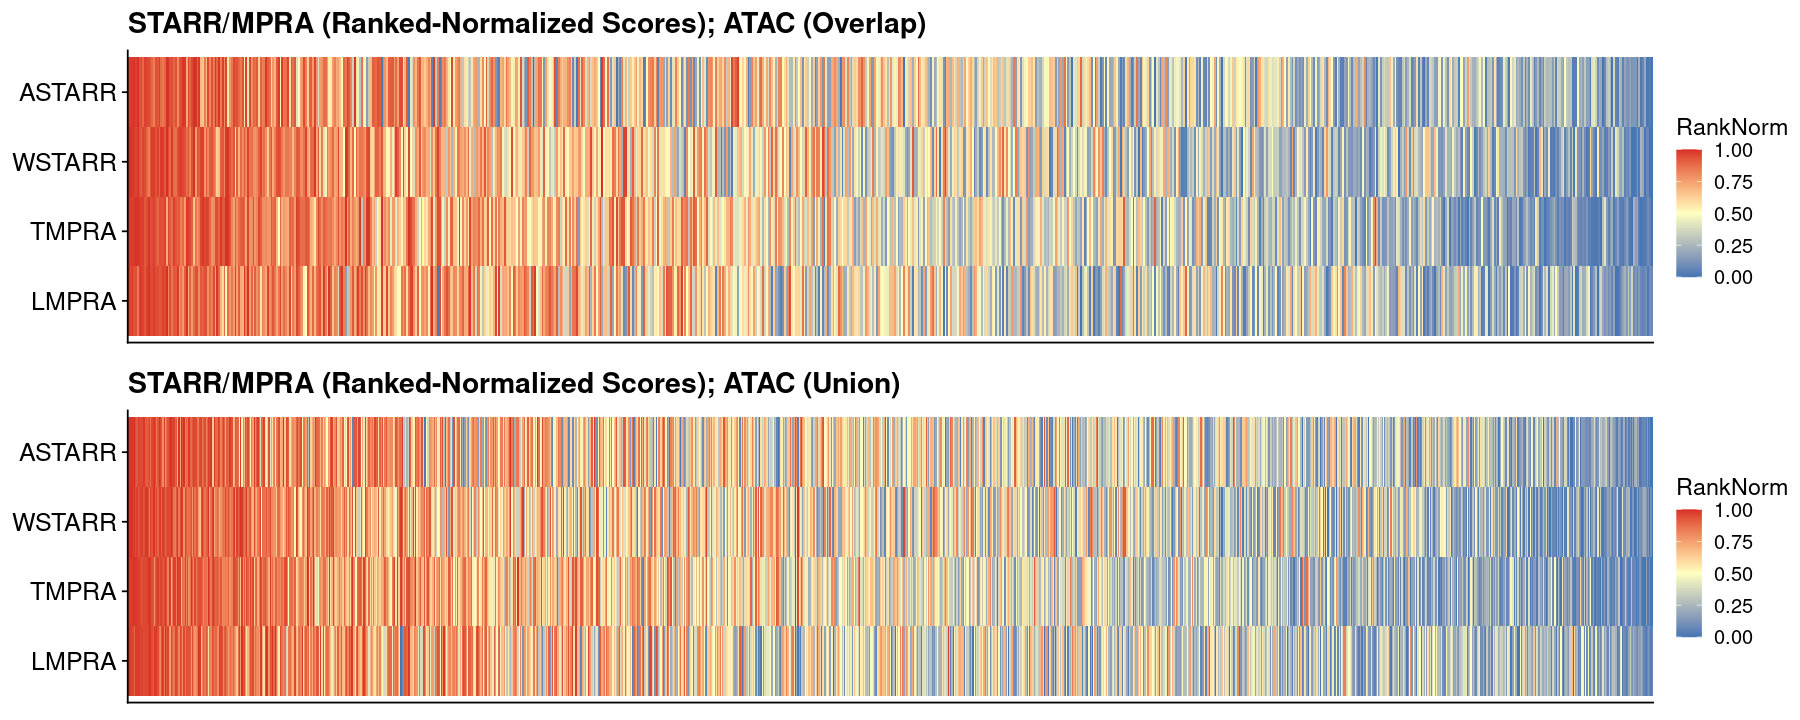

In [39]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_ranknorm_starrmpra_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        labs(x="Open Chromatin Regions") +
        theme_cowplot() + 
        theme_text +
        theme_fill #+
        #theme_legend
    return(gpt)
})

### add title
idx = "fcc_astarr_macs_input_overlap"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Overlap)")
idx = "fcc_astarr_macs_input_union"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Union)")

### assign and show
lst_gpt_region_score_starrmpra = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

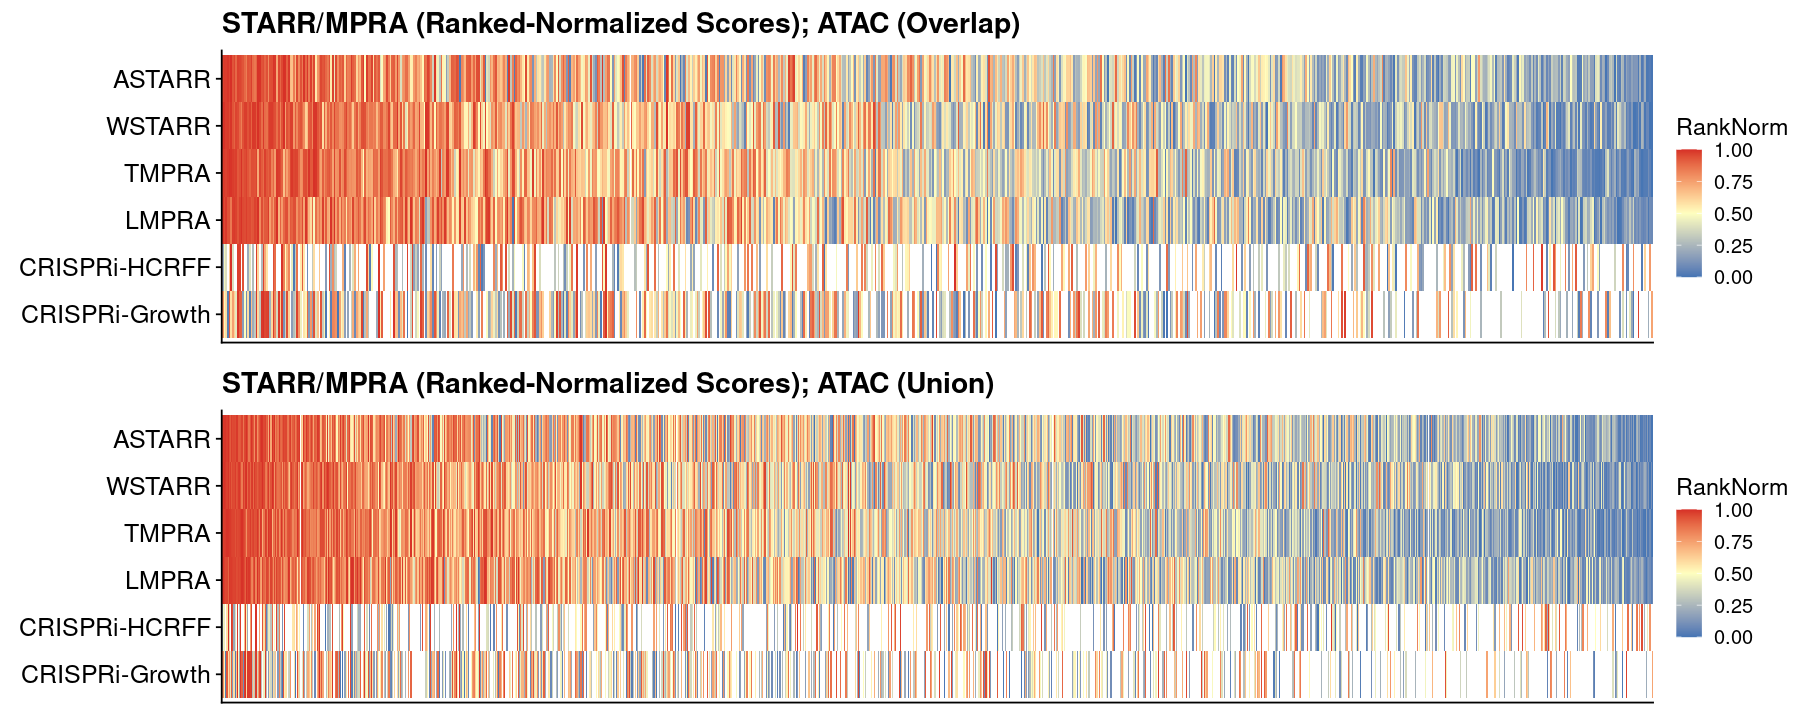

In [55]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5,
    na.value = "white"
)
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_ranknorm_starrmpracrispr_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        labs(x="Open Chromatin Regions") +
        theme_cowplot() + 
        theme_text +
        theme_fill #+
        #theme_legend
    return(gpt)
})

### add title
idx = "fcc_astarr_macs_input_overlap"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Overlap)")
idx = "fcc_astarr_macs_input_union"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Union)")

### assign and show
lst_gpt_region_score_starrmpra = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

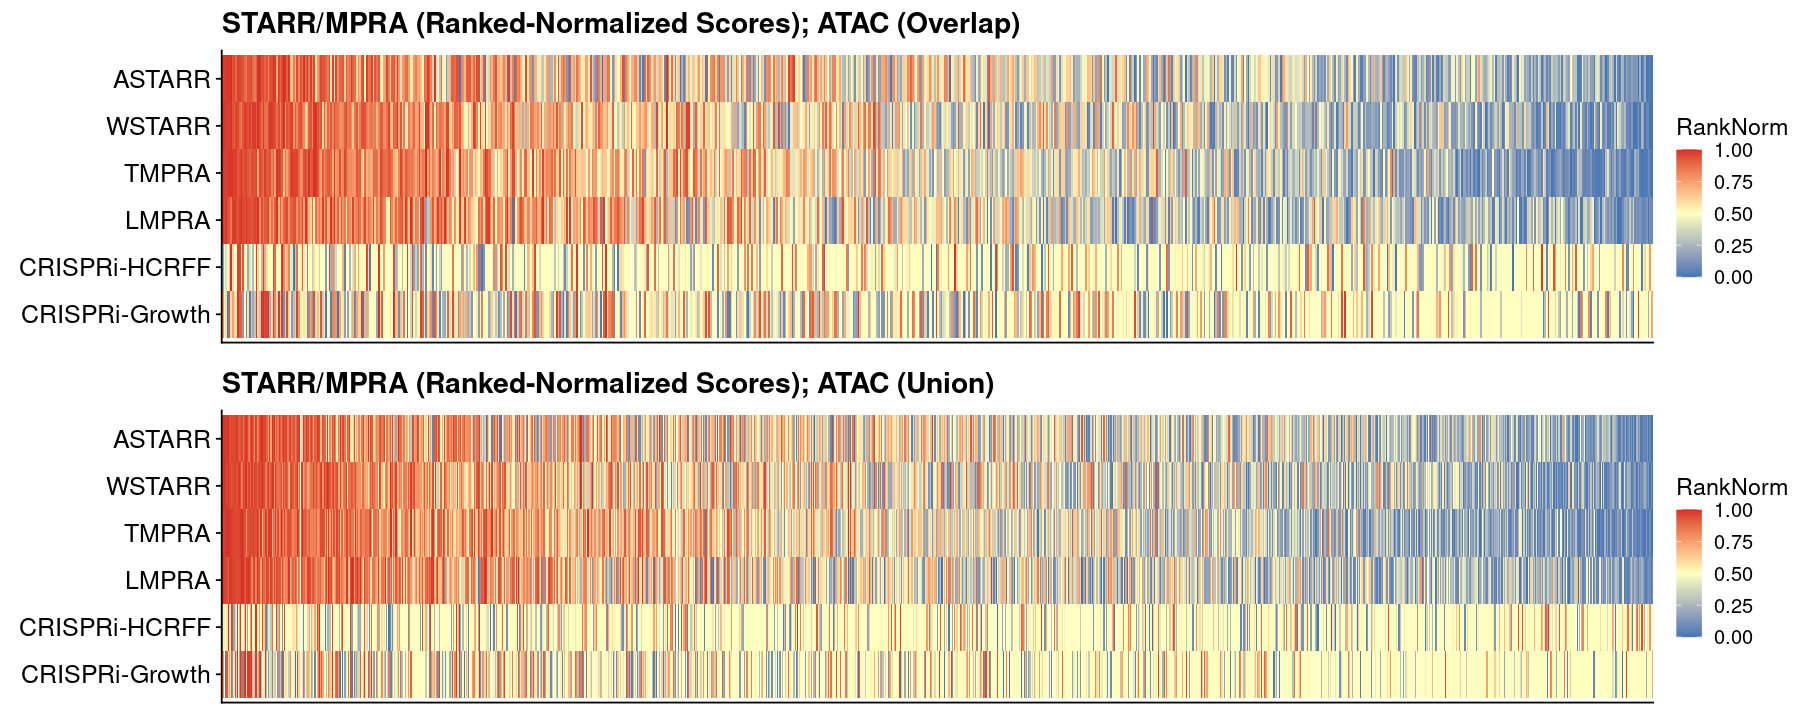

In [56]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5,
    na.value = "#ffffbf"
)
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_ranknorm_starrmpracrispr_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        labs(x="Open Chromatin Regions") +
        theme_cowplot() + 
        theme_text +
        theme_fill #+
        #theme_legend
    return(gpt)
})

### add title
idx = "fcc_astarr_macs_input_overlap"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Overlap)")
idx = "fcc_astarr_macs_input_union"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Union)")

### assign and show
lst_gpt_region_score_starrmpra = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Label regions

### Import labeled CREs

**Check files**

In [57]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
txt_fname  = "region.annotation.genome_cres.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_cres.tsv 


**Read tables**

In [58]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname  = "region.annotation.genome_cres.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_cres_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 27 12

$fcc_astarr_macs_input_union
[1] 27 12



Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5275455,5276164,chr11:5275455-5276164,chr11:5275456-5276164,genome_cres,LCR HS1,enhancer,HBE1,locus control region HS1,NA,known CREs
chr11,5280584,5281266,chr11:5280584-5281266,chr11:5280585-5281266,genome_cres,LCR HS2,enhancer,HBE1,locus control region HS2,NA,known CREs


**Arrange table**

In [63]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
    vec_txt_assay = rev(vec_txt_assay)
    
    ### set the order of region
    lst = lst_dat_region_score_ranknorm_starrmpracrispr
    dat = lst[[txt_folder]]
    
    
    ### get table and arrange
    lst = lst_dat_region_annot_cres_import
    tmp = lst[[txt_folder]]
    
    ###
    vec = c("Chrom", "ChromStart", "ChromEnd", "Region")
    dat = dplyr::inner_join(dat, tmp, by = vec)
    return(dat)
})

### assign and show
lst_dat_region_score_cres_merge = lst

res = lapply(lst, dim)
print(res)

vec = lst[[1]]
head(vec, 3)

$fcc_astarr_macs_input_overlap
[1] 126  16

$fcc_astarr_macs_input_union
[1] 132  16



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,TMPRA,-0.7737500,0.2514828,0.5387011,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5269503,5270633,chr11:5269503-5270633,ASTARR,-0.1540116,0.3819692,0.5387011,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5269503,5270633,chr11:5269503-5270633,WSTARR,0.3961214,0.8303677,0.5387011,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs


In [64]:
lst = lst_dat_region_score_cres_merge
lst = lapply(lst, function(dat){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
    vec_txt_assay = rev(vec_txt_assay)
    
    ### set the order of region
    tmp = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = tmp$Region

    ### renew factor level based on the order
    dat = dat %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_score_cres_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 126  16

$fcc_astarr_macs_input_union
[1] 132  16



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,TMPRA,-0.7737500,0.2514828,0.5387011,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5269503,5270633,chr11:5269503-5270633,ASTARR,-0.1540116,0.3819692,0.5387011,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5269503,5270633,chr11:5269503-5270633,WSTARR,0.3961214,0.8303677,0.5387011,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs


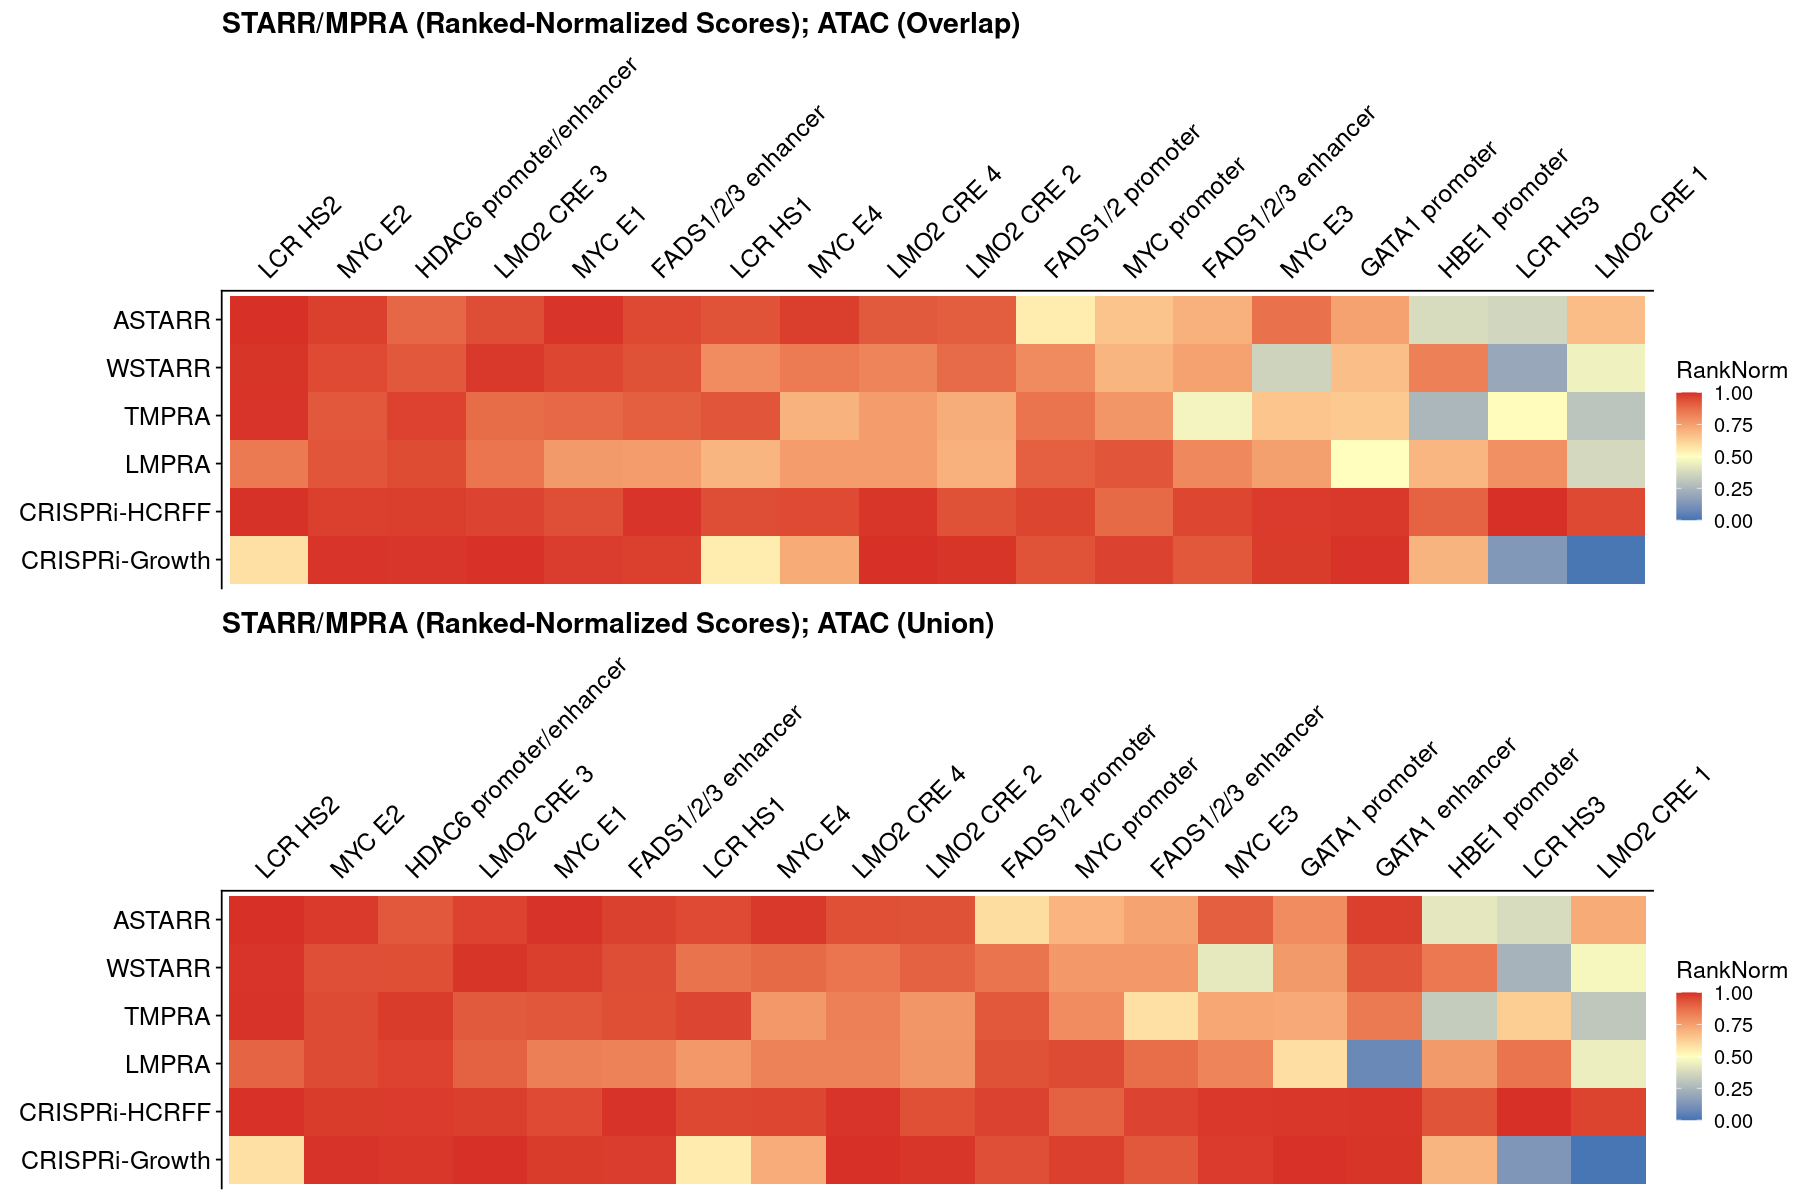

In [106]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5,
    na.value = "black",
    limits   = c(0, 1)
)
theme_text = theme(
    plot.title   = element_text(size = 17, face = "bold"),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_text(size = 15, angle = 45, vjust = 0, hjust=0),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_cres_arrange
lst = lapply(lst, function(dat){

    vec = c("LCR HS4", "LCR HS5")
    dat = dat %>% 
        dplyr::filter(Note == "known CREs") %>%
        dplyr::filter(!(Label %in% vec))

    vec_txt_label = setNames(dat$Label, dat$Region)
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        scale_x_discrete(
            position = "top",
            labels   = vec_txt_label
        ) +
        labs(x="Open Chromatin Regions") +
        theme_cowplot() + 
        theme_text +
        theme_fill 
    return(gpt)
})

### add title
idx = "fcc_astarr_macs_input_overlap"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Overlap)")
idx = "fcc_astarr_macs_input_union"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Union)")

### assign and show
lst_gpt_region_score_cres = lst

options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

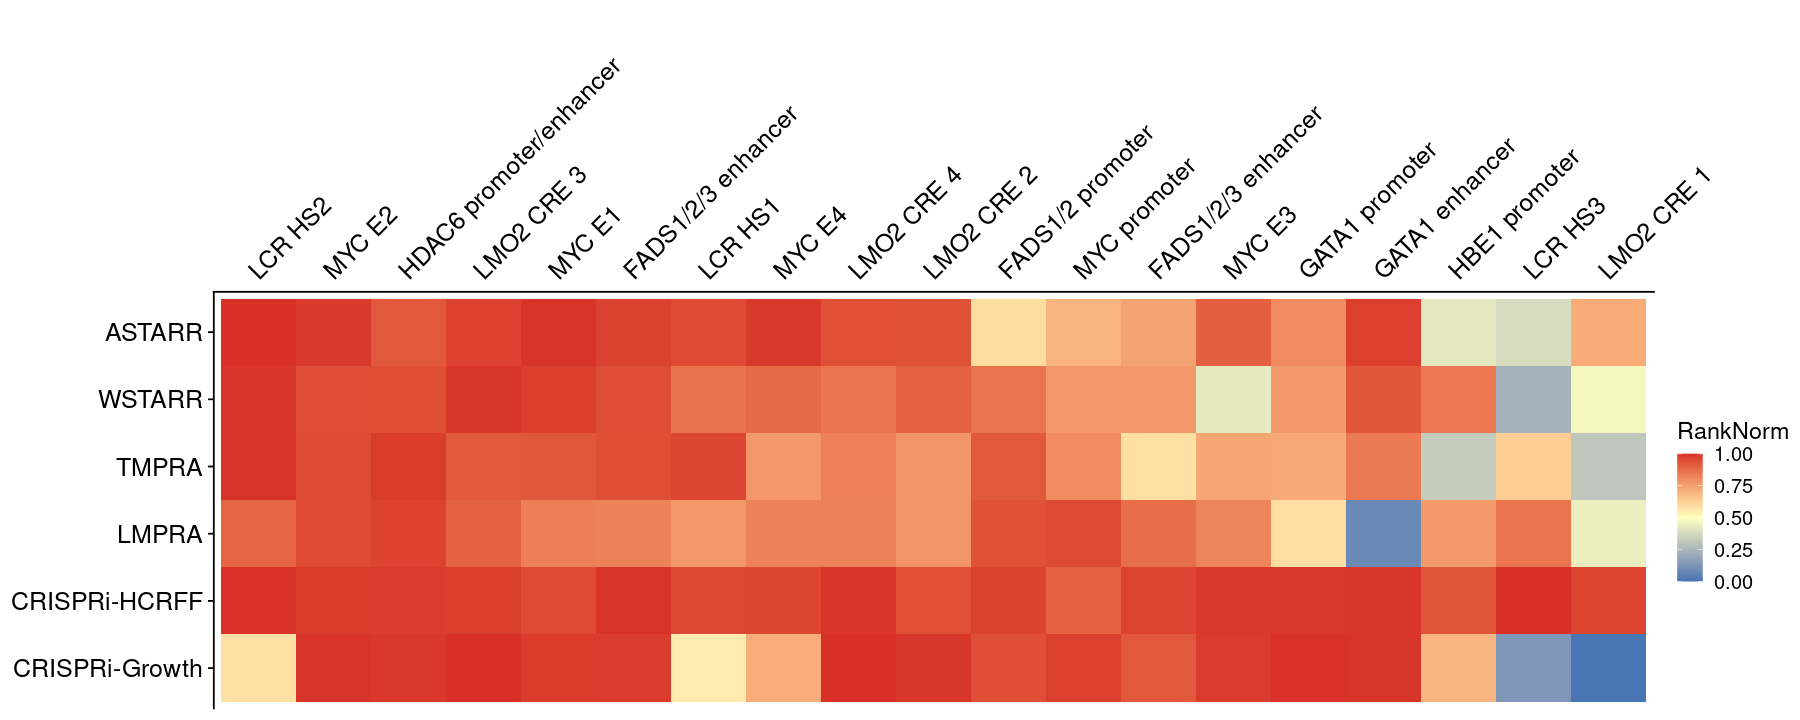

In [107]:
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_score_cres
gpt = lst[[idx]]
gpt = gpt + labs(title = "")

### assign and show
gpt_export_ranknorm_cres = gpt
options(repr.plot.height=6, repr.plot.width=15)
print(gpt)

In [ ]:
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_score_cres
dat = lst[[idx]]


In [9]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    ### get reporter assays
    dat = dat %>% 
        dplyr::mutate(Assay = Assay_Label) %>% 
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Assay, Score)

    ### get regions screened by all assays
    dat = dat %>% tidyr::spread(Assay, Score) %>% na.omit
    return(dat)
})

### assign and show
lst_dat_region_score_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 228  10

$fcc_astarr_macs_input_union
[1] 243  10



Chrom,ChromStart,ChromEnd,Region,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,4607720,4608631,chr11:4607720-4608631,0.4768911,0.0005555,-0.07925128,0.01794737,2.0463150,0.2192692
chr11,4626130,4626649,chr11:4626130-4626649,-0.1023704,-0.1132086,-0.01447457,1.22331688,0.7471528,-0.4203753
chr11,4636808,4637676,chr11:4636808-4637676,-0.1424146,0.0212365,-0.08207766,1.16885741,0.8838463,-0.3193281


## Rank normalized scores

**Helper function**

In [10]:
fun_ranknorm = function(x) {
    ### Remove NA values for ranking
    r = rank(x, na.last = "keep", ties.method = "average")
    n = sum(!is.na(x)) 

    ### return rank-normalized scores; return NAs if no value
    if (n <= 0) return(rep(NA, length(x)))
    return((r - 1) / (n - 1))
}

**Rank normalize**

In [11]:
lst = lst_dat_region_score_arrange
lst = lapply(lst, function(dat){
    ### convert wide matrix to long format
    dat = dat %>% tidyr::gather(Assay, Score, -Chrom, -ChromStart, -ChromEnd, -Region)

    ### rank normalized region scores by assay
    dat = dat %>%
        dplyr::group_by(Assay) %>%
        dplyr::mutate(RankNorm = fun_ranknorm(Score)) %>%
        dplyr::ungroup()

    ### calculate mean of rank nomrlized scores
    dat = dat %>%
        dplyr::group_by(Chrom, ChromStart, ChromEnd, Region) %>%
        dplyr::mutate(Mean = mean(RankNorm)) %>%
        dplyr::ungroup()
    
    return(dat)
})

### assign and show
lst_dat_region_score_ranknorm = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 1368    8

$fcc_astarr_macs_input_union
[1] 1458    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.4768911,0.6651982,0.5051395
chr11,4626130,4626649,chr11:4626130-4626649,ASTARR,-0.1023704,0.2511013,0.3656388
chr11,4636808,4637676,chr11:4636808-4637676,ASTARR,-0.1424146,0.2158590,0.3839941


**Check: Assay count**

In [12]:
lst = lst_dat_region_score_ranknorm
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR,228,243
CRISPRi-Growth,228,243
CRISPRi-HCRFF,228,243
LMPRA,228,243
TMPRA,228,243
WSTARR,228,243


**Check: Region count**

In [13]:
lst = lst_dat_region_score_ranknorm
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::select(Region, Mean) %>%
        dplyr::distinct()
    num = nrow(dat)
    return(num)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] 228

$fcc_astarr_macs_input_union
[1] 243



## Export results

In [14]:
for (txt_folder in VEC_TXT_FOLDER){
    ### get tables
    dat_region_score = lst_dat_region_score_ranknorm[[txt_folder]]
    
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    
    ### write table
    txt_fname = "region.coverage.ranknorm.overlap.starrmpracrispr.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    dat = dat_region_score
    write_tsv(dat, txt_fpath)
}